In [1]:
# Set up environment with libraries & data

# Importing Packages/Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import itertools

from numpy import arange
from numpy import mean
from numpy import std

from tqdm.notebook import tqdm

from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, RepeatedStratifiedKFold, GridSearchCV
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.datasets import make_classification

from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve,make_scorer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans

from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler

from imblearn.over_sampling import SMOTE

from six import StringIO

from IPython.display import Image

import statsmodels.formula.api as smf

import pydotplus

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Accessing Dataset
r_train = pd.read_csv("data/train.csv")
r_test = pd.read_csv("data/test.csv")

### EDA for Train

In [2]:
r_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [3]:
r_train.shape

(8693, 14)

In [4]:
r_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
r_train.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')>

In [6]:
r_train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

### EDA for Test

In [7]:
r_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [8]:
r_test.shape

(4277, 13)

In [9]:
r_test.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
5,0027_01,Earth,False,F/7/P,TRAPPIST-1e,31.0,False,0.0,1615.0,263.0,113.0,60.0,Karlen Ricks
6,0029_01,Europa,True,B/2/P,55 Cancri e,21.0,False,0.0,NaN,0.0,0.0,0.0,Aldah Ainserfle
7,0032_01,Europa,True,D/0/S,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,Acrabi Pringry
8,0032_02,Europa,True,D/0/S,55 Cancri e,23.0,False,0.0,0.0,0.0,0.0,0.0,Dhena Pringry
9,0033_01,Earth,False,F/7/S,55 Cancri e,24.0,False,0.0,639.0,0.0,0.0,0.0,Eliana Delazarson


In [10]:
r_test.value_counts("HomePlanet")

HomePlanet
Earth     2263
Europa    1002
Mars       925
dtype: int64

In [11]:
r_test.value_counts("CryoSleep")

CryoSleep
False    2640
True     1544
dtype: int64

In [12]:
r_test.value_counts("Cabin")

Cabin
G/160/P     8
B/31/P      7
E/228/S     7
D/273/S     7
G/748/S     7
           ..
F/1291/S    1
F/1292/P    1
F/1297/S    1
F/1298/S    1
T/4/P       1
Length: 3265, dtype: int64

In [13]:
r_test.value_counts("Destination")

Destination
TRAPPIST-1e      2956
55 Cancri e       841
PSO J318.5-22     388
dtype: int64

In [14]:
r_test.value_counts("Age")

Age
18.0    176
22.0    163
19.0    162
20.0    160
24.0    158
       ... 
74.0      2
75.0      2
79.0      2
77.0      1
78.0      1
Length: 79, dtype: int64

In [15]:
r_test.value_counts("VIP")

VIP
False    4110
True       74
dtype: int64

In [16]:
r_test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

### Cleaning Train

In [2]:
le = preprocessing.LabelEncoder()

# Cleaning and Nulls
train = r_train[['HomePlanet',
                 'CryoSleep',
                 'Cabin',
                 'Destination',
                 'Age',
                 'VIP',
                 'RoomService',
                 'FoodCourt',
                 'ShoppingMall',
                 'Spa',
                 'VRDeck',
                 'Transported']]

train[['CabinFloor','CabinNumber','CabinType']] = train['Cabin'].str.split(pat='/',expand=True)

train = train.astype({'HomePlanet':'category',
                      'CryoSleep':'string',
                      'Cabin':'string',
                      'Destination':'category',
                      'Age':'float',
                      'VIP':'string',
                      'RoomService':'float',
                      'FoodCourt':'float',
                      'ShoppingMall':'float',
                      'Spa':'float',
                      'VRDeck':'float',
                      'Transported':'string',
                      'CabinFloor':'category',
                      'CabinNumber':'float',
                      'CabinType':'category'})

# 2
train['CryoSleep_N'] = train['CryoSleep'].map({'True':1,'False':0})
train['VIP_N'] = train['VIP'].map({'True':1,'False':0})
train['Transported_N'] = train['Transported'].map({'True':1,'False':0})
train['CabinType_N'] = le.fit_transform(train['CabinType'])

fillnalist_1 = ['CryoSleep_N','VIP_N','Transported_N','CabinType_N']

for column in fillnalist_1:
    prob = (train[column].sum() / train[column].notnull().sum())
    train[column] = train[column].apply(lambda x:
                                        1 if x == 1
                                        else(0 if x == 0
                                             else(1 if random.random() < prob
                                                  else 0)))

train['HomePlanet_N'] = le.fit_transform(train['HomePlanet'])
train['Destination_N'] = le.fit_transform(train['Destination'])

fillnalist_2 = ['HomePlanet_N','Destination_N']

for column in fillnalist_2:
    prob2 = (len(train[train[column]==2]) / train[column].notnull().sum())
    prob1 = (len(train[train[column]==1]) / train[column].notnull().sum())
    train[column] = train[column].apply(lambda x:
                                        2 if x == 2
                                        else(1 if x == 1
                                             else(0 if x == 0
                                                  else(2 if random.random() < prob2
                                                       else (1 if random.random() < (prob1+prob2)
                                                             else 0)))))

train['CabinFloor_N'] = le.fit_transform(train['CabinFloor'])
prob7 = (len(train[train['CabinFloor_N']==7]) / train['CabinFloor_N'].notnull().sum())
prob6 = (len(train[train['CabinFloor_N']==6]) / train['CabinFloor_N'].notnull().sum())
prob5 = (len(train[train['CabinFloor_N']==5]) / train['CabinFloor_N'].notnull().sum())
prob4 = (len(train[train['CabinFloor_N']==4]) / train['CabinFloor_N'].notnull().sum())
prob3 = (len(train[train['CabinFloor_N']==3]) / train['CabinFloor_N'].notnull().sum())
prob2 = (len(train[train['CabinFloor_N']==2]) / train['CabinFloor_N'].notnull().sum())
prob1 = (len(train[train['CabinFloor_N']==1]) / train['CabinFloor_N'].notnull().sum())
train['CabinFloor_N'] = train['CabinFloor_N'].apply(lambda x:
                                                    7 if x == 7 else(6 if x == 6 else(5 if x == 5 else(4 if x == 4 else(3 if x == 3 else(2 if x == 2 else(1 if x == 1 else(0 if x == 0
                                                    else(7 if random.random() < prob7
                                                        else(6 if random.random() < (prob7+prob6)
                                                             else(5 if random.random() < (prob7+prob6+prob5)
                                                                 else(4 if random.random() < (prob7+prob6+prob5+prob4)
                                                                     else(3 if random.random() < (prob7+prob6+prob5+prob4+prob3)
                                                                         else(2 if random.random() < (prob7+prob6+prob5+prob4+prob3+prob2)
                                                                         else(1 if random.random() < (prob7+prob6+prob5+prob4+prob3+prob2+prob1)
                                                                         else 0)))))))))))))))

# Dummies
dum_HomePlanet = pd.get_dummies(train['HomePlanet_N'],prefix='HomePlanet',prefix_sep='_')
dum_Destination = pd.get_dummies(train['Destination_N'],prefix='Destination',prefix_sep='_')
dum_CabinFloor = pd.get_dummies(train['CabinFloor_N'],prefix='CabinFloor',prefix_sep='_')
dum_CabinType = pd.get_dummies(train['CabinType_N'],prefix='CabinType',prefix_sep='_')
dummies_list = [dum_HomePlanet,dum_Destination,dum_CabinFloor,dum_CabinType]

for df in dummies_list:
    train = train.merge(df,
                        how="left",
                        left_index=True,
                        right_index=True)

train['Age'] = train['Age'].astype('float').fillna(train['Age'].median()).astype('float')
train['RoomService'] = train['RoomService'].astype('float').fillna(train['RoomService'].median()).astype('float')
train['FoodCourt'] = train['FoodCourt'].astype('float').fillna(train['FoodCourt'].median()).astype('float')
train['ShoppingMall'] = train['ShoppingMall'].astype('float').fillna(train['ShoppingMall'].median()).astype('float')
train['Spa'] = train['Spa'].astype('float').fillna(train['Spa'].median()).astype('float')
train['VRDeck'] = train['VRDeck'].astype('float').fillna(train['VRDeck'].median()).astype('float')
train['CabinNumber'] = train['CabinNumber'].astype('float').fillna(train['CabinNumber'].median()).astype('float')

# Bins
train['AgeBin'] = pd.cut(train['Age'], bins=5,labels=(1,2,3,4,5))
train['RoomServiceBin'] = pd.cut(train['RoomService'], bins=5,labels=(1,2,3,4,5))
train['FoodCourtBin'] = pd.cut(train['FoodCourt'], bins=5,labels=(1,2,3,4,5))
train['ShoppingMallBin'] = pd.cut(train['ShoppingMall'], bins=5,labels=(1,2,3,4,5))
train['SpaBin'] = pd.cut(train['Spa'], bins=5,labels=(1,2,3,4,5))
train['VRDeckBin'] = pd.cut(train['VRDeck'], bins=5,labels=(1,2,3,4,5))
train['CabinNumberBin'] = pd.cut(train['CabinNumber'], bins=5,labels=(1,2,3,4,5))

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 45 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   HomePlanet       8492 non-null   category
 1   CryoSleep        8476 non-null   string  
 2   Cabin            8494 non-null   string  
 3   Destination      8511 non-null   category
 4   Age              8693 non-null   float64 
 5   VIP              8490 non-null   string  
 6   RoomService      8693 non-null   float64 
 7   FoodCourt        8693 non-null   float64 
 8   ShoppingMall     8693 non-null   float64 
 9   Spa              8693 non-null   float64 
 10  VRDeck           8693 non-null   float64 
 11  Transported      8693 non-null   string  
 12  CabinFloor       8494 non-null   category
 13  CabinNumber      8693 non-null   float64 
 14  CabinType        8494 non-null   category
 15  CryoSleep_N      8693 non-null   int64   
 16  VIP_N            8693 non-null   int64   


In [3]:
train_final = train[['HomePlanet_N',
                      'HomePlanet_0',
                      'HomePlanet_1',
                      'HomePlanet_2',
                      'CryoSleep_N',
                      'CabinFloor_N',
                      'CabinFloor_0',
                      'CabinFloor_1',
                      'CabinFloor_2',
                      'CabinFloor_3',
                      'CabinFloor_4',
                      'CabinFloor_5',
                      'CabinFloor_6',
                      'CabinFloor_7',
                      'CabinNumber',
                      'CabinNumberBin',
                      'CabinType_N',
                      'CabinType_0',
                      'CabinType_1',
                      'Destination_N',
                      'Destination_0',
                      'Destination_1',
                      'Destination_2',
                      'Age',
                      'AgeBin',
                      'VIP_N',
                      'RoomService',
                      'RoomServiceBin',
                      'FoodCourt',
                      'FoodCourtBin',
                      'ShoppingMall',
                      'ShoppingMallBin',
                      'Spa',
                      'SpaBin',
                      'VRDeck',
                      'VRDeckBin',
                      'Transported',
                      'Transported_N']]

train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   HomePlanet_N     8693 non-null   int64   
 1   HomePlanet_0     8693 non-null   uint8   
 2   HomePlanet_1     8693 non-null   uint8   
 3   HomePlanet_2     8693 non-null   uint8   
 4   CryoSleep_N      8693 non-null   int64   
 5   CabinFloor_N     8693 non-null   int64   
 6   CabinFloor_0     8693 non-null   uint8   
 7   CabinFloor_1     8693 non-null   uint8   
 8   CabinFloor_2     8693 non-null   uint8   
 9   CabinFloor_3     8693 non-null   uint8   
 10  CabinFloor_4     8693 non-null   uint8   
 11  CabinFloor_5     8693 non-null   uint8   
 12  CabinFloor_6     8693 non-null   uint8   
 13  CabinFloor_7     8693 non-null   uint8   
 14  CabinNumber      8693 non-null   float64 
 15  CabinNumberBin   8693 non-null   category
 16  CabinType_N      8693 non-null   int64   


### Cleaning Test

In [4]:
le = preprocessing.LabelEncoder()

# Cleaning and Nulls
test = r_test[['PassengerId',
               'HomePlanet',
               'CryoSleep',
               'Cabin',
               'Destination',
               'Age',
               'VIP',
               'RoomService',
               'FoodCourt',
               'ShoppingMall',
               'Spa',
               'VRDeck']]

test[['CabinFloor','CabinNumber','CabinType']] = test['Cabin'].str.split(pat='/',expand=True)

test = test.astype({'HomePlanet':'category',
                      'CryoSleep':'string',
                      'Cabin':'string',
                      'Destination':'category',
                      'Age':'float',
                      'VIP':'string',
                      'RoomService':'float',
                      'FoodCourt':'float',
                      'ShoppingMall':'float',
                      'Spa':'float',
                      'VRDeck':'float',
                      'CabinFloor':'category',
                      'CabinNumber':'float',
                      'CabinType':'category'})

# 2
test['CryoSleep_N'] = test['CryoSleep'].map({'True':1,'False':0})
test['VIP_N'] = test['VIP'].map({'True':1,'False':0})
test['CabinType_N'] = le.fit_transform(test['CabinType'])

fillnalist_1 = ['CryoSleep_N','VIP_N','CabinType_N']

for column in fillnalist_1:
    prob = (test[column].sum() / test[column].notnull().sum())
    test[column] = test[column].apply(lambda x:
                                        1 if x == 1
                                        else(0 if x == 0
                                             else(1 if random.random() < prob
                                                  else 0)))

test['HomePlanet_N'] = le.fit_transform(test['HomePlanet'])
test['Destination_N'] = le.fit_transform(test['Destination'])

fillnalist_2 = ['HomePlanet_N','Destination_N']

for column in fillnalist_2:
    prob2 = (len(test[test[column]==2]) / test[column].notnull().sum())
    prob1 = (len(test[test[column]==1]) / test[column].notnull().sum())
    test[column] = test[column].apply(lambda x:
                                        2 if x == 2
                                        else(1 if x == 1
                                             else(0 if x == 0
                                                  else(2 if random.random() < prob2
                                                       else (1 if random.random() < (prob1+prob2)
                                                             else 0)))))

test['CabinFloor_N'] = le.fit_transform(test['CabinFloor'])
prob7 = (len(test[test['CabinFloor_N']==7]) / test['CabinFloor_N'].notnull().sum())
prob6 = (len(test[test['CabinFloor_N']==6]) / test['CabinFloor_N'].notnull().sum())
prob5 = (len(test[test['CabinFloor_N']==5]) / test['CabinFloor_N'].notnull().sum())
prob4 = (len(test[test['CabinFloor_N']==4]) / test['CabinFloor_N'].notnull().sum())
prob3 = (len(test[test['CabinFloor_N']==3]) / test['CabinFloor_N'].notnull().sum())
prob2 = (len(test[test['CabinFloor_N']==2]) / test['CabinFloor_N'].notnull().sum())
prob1 = (len(test[test['CabinFloor_N']==1]) / test['CabinFloor_N'].notnull().sum())
test['CabinFloor_N'] = test['CabinFloor_N'].apply(lambda x:
                                                    7 if x == 7 else(6 if x == 6 else(5 if x == 5 else(4 if x == 4 else(3 if x == 3 else(2 if x == 2 else(1 if x == 1 else(0 if x == 0
                                                    else(7 if random.random() < prob7
                                                        else(6 if random.random() < (prob7+prob6)
                                                             else(5 if random.random() < (prob7+prob6+prob5)
                                                                 else(4 if random.random() < (prob7+prob6+prob5+prob4)
                                                                     else(3 if random.random() < (prob7+prob6+prob5+prob4+prob3)
                                                                         else(2 if random.random() < (prob7+prob6+prob5+prob4+prob3+prob2)
                                                                         else(1 if random.random() < (prob7+prob6+prob5+prob4+prob3+prob2+prob1)
                                                                         else 0)))))))))))))))

# Dummies
dum_HomePlanet = pd.get_dummies(test['HomePlanet_N'],prefix='HomePlanet',prefix_sep='_')
dum_Destination = pd.get_dummies(test['Destination_N'],prefix='Destination',prefix_sep='_')
dum_CabinFloor = pd.get_dummies(test['CabinFloor_N'],prefix='CabinFloor',prefix_sep='_')
dum_CabinType = pd.get_dummies(test['CabinType_N'],prefix='CabinType',prefix_sep='_')
dummies_list = [dum_HomePlanet,dum_Destination,dum_CabinFloor,dum_CabinType]

for df in dummies_list:
    test = test.merge(df,
                        how="left",
                        left_index=True,
                        right_index=True)

test['Age'] = test['Age'].astype('float').fillna(test['Age'].median()).astype('float')
test['RoomService'] = test['RoomService'].astype('float').fillna(test['RoomService'].median()).astype('float')
test['FoodCourt'] = test['FoodCourt'].astype('float').fillna(test['FoodCourt'].median()).astype('float')
test['ShoppingMall'] = test['ShoppingMall'].astype('float').fillna(test['ShoppingMall'].median()).astype('float')
test['Spa'] = test['Spa'].astype('float').fillna(test['Spa'].median()).astype('float')
test['VRDeck'] = test['VRDeck'].astype('float').fillna(test['VRDeck'].median()).astype('float')
test['CabinNumber'] = test['CabinNumber'].astype('float').fillna(test['CabinNumber'].median()).astype('float')

# Bins
test['AgeBin'] = pd.cut(test['Age'], bins=5,labels=(1,2,3,4,5))
test['RoomServiceBin'] = pd.cut(test['RoomService'], bins=5,labels=(1,2,3,4,5))
test['FoodCourtBin'] = pd.cut(test['FoodCourt'], bins=5,labels=(1,2,3,4,5))
test['ShoppingMallBin'] = pd.cut(test['ShoppingMall'], bins=5,labels=(1,2,3,4,5))
test['SpaBin'] = pd.cut(test['Spa'], bins=5,labels=(1,2,3,4,5))
test['VRDeckBin'] = pd.cut(test['VRDeck'], bins=5,labels=(1,2,3,4,5))
test['CabinNumberBin'] = pd.cut(test['CabinNumber'], bins=5,labels=(1,2,3,4,5))

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   PassengerId      4277 non-null   object  
 1   HomePlanet       4190 non-null   category
 2   CryoSleep        4184 non-null   string  
 3   Cabin            4177 non-null   string  
 4   Destination      4185 non-null   category
 5   Age              4277 non-null   float64 
 6   VIP              4184 non-null   string  
 7   RoomService      4277 non-null   float64 
 8   FoodCourt        4277 non-null   float64 
 9   ShoppingMall     4277 non-null   float64 
 10  Spa              4277 non-null   float64 
 11  VRDeck           4277 non-null   float64 
 12  CabinFloor       4177 non-null   category
 13  CabinNumber      4277 non-null   float64 
 14  CabinType        4177 non-null   category
 15  CryoSleep_N      4277 non-null   int64   
 16  VIP_N            4277 non-null   int64   


In [5]:
test_final = test[['PassengerId',
                   'HomePlanet_N',
                   'HomePlanet_0',
                   'HomePlanet_1',
                   'HomePlanet_2',
                   'CryoSleep_N',
                   'CabinFloor_N',
                   'CabinFloor_0',
                   'CabinFloor_1',
                   'CabinFloor_2',
                   'CabinFloor_3',
                   'CabinFloor_4',
                   'CabinFloor_5',
                   'CabinFloor_6',
                   'CabinFloor_7',
                   'CabinNumber',
                   'CabinNumberBin',
                   'CabinType_N',
                   'CabinType_0',
                   'CabinType_1',
                   'Destination_N',
                   'Destination_0',
                   'Destination_1',
                   'Destination_2',
                   'Age',
                   'AgeBin',
                   'VIP_N',
                   'RoomService',
                   'RoomServiceBin',
                   'FoodCourt',
                   'FoodCourtBin',
                   'ShoppingMall',
                   'ShoppingMallBin',
                   'Spa',
                   'SpaBin',
                   'VRDeck',
                   'VRDeckBin']]
test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   PassengerId      4277 non-null   object  
 1   HomePlanet_N     4277 non-null   int64   
 2   HomePlanet_0     4277 non-null   uint8   
 3   HomePlanet_1     4277 non-null   uint8   
 4   HomePlanet_2     4277 non-null   uint8   
 5   CryoSleep_N      4277 non-null   int64   
 6   CabinFloor_N     4277 non-null   int64   
 7   CabinFloor_0     4277 non-null   uint8   
 8   CabinFloor_1     4277 non-null   uint8   
 9   CabinFloor_2     4277 non-null   uint8   
 10  CabinFloor_3     4277 non-null   uint8   
 11  CabinFloor_4     4277 non-null   uint8   
 12  CabinFloor_5     4277 non-null   uint8   
 13  CabinFloor_6     4277 non-null   uint8   
 14  CabinFloor_7     4277 non-null   uint8   
 15  CabinNumber      4277 non-null   float64 
 16  CabinNumberBin   4277 non-null   category


### Feature Engineering, Correlations

In [6]:
train_final.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['HomePlanet_N', 'HomePlanet_0', 'HomePlanet_1', 'HomePlanet_2',
       'CryoSleep_N', 'CabinFloor_N', 'CabinFloor_0', 'CabinFloor_1',
       'CabinFloor_2', 'CabinFloor_3', 'CabinFloor_4', 'CabinFloor_5',
       'CabinFloor_6', 'CabinFloor_7', 'CabinNumber', 'CabinNumberBin',
       'CabinType_N', 'CabinType_0', 'CabinType_1', 'Destination_N',
       'Destination_0', 'Destination_1', 'Destination_2', 'Age', 'AgeBin',
       'VIP_N', 'RoomService', 'RoomServiceBin', 'FoodCourt', 'FoodCourtBin',
       'ShoppingMall', 'ShoppingMallBin', 'Spa', 'SpaBin', 'VRDeck',
       'VRDeckBin', 'Transported', 'Transported_N'],
      dtype='object')>

In [7]:
train_final['TotalSpending'] = train_final['RoomService']+train_final['FoodCourt']+train_final['ShoppingMall']+train_final['Spa']+train_final['VRDeck']
train_final['SpendingMultiplied'] = (train_final['RoomServiceBin'].astype('float')*
                                     train_final['FoodCourtBin'].astype('float')*
                                     train_final['ShoppingMallBin'].astype('float')*
                                     train_final['SpaBin'].astype('float')*
                                     train_final['VRDeckBin'].astype('float'))
test_final['TotalSpending'] = test_final['RoomService']+test_final['FoodCourt']+test_final['ShoppingMall']+test_final['Spa']+test_final['VRDeck']
test_final['SpendingMultiplied'] = (test_final['RoomServiceBin'].astype('float')*
                                     test_final['FoodCourtBin'].astype('float')*
                                     test_final['ShoppingMallBin'].astype('float')*
                                     test_final['SpaBin'].astype('float')*
                                     test_final['VRDeckBin'].astype('float'))

In [8]:
heatmap = train_final[[
                'HomePlanet_N',
#                'HomePlanet_0',
#                'HomePlanet_1',
#                'HomePlanet_2',
#                'CryoSleep_N',
                'CabinFloor_N',
#                'CabinFloor_0',
#                'CabinFloor_1',
#                'CabinFloor_2',
#                'CabinFloor_3',
#                'CabinFloor_4',
#                'CabinFloor_5',
#                'CabinFloor_6',
#                'CabinFloor_7',
#                'CabinNumber',
#                'CabinNumberBin',
                'CabinType_N',
#                'CabinType_0',
#                'CabinType_1',
                'Destination_N',
#                'Destination_0',
#                'Destination_1',
#                'Destination_2',
                'Age',
#                'AgeBin',
                'VIP_N',
                'RoomService',
#                'RoomServiceBin',
                'FoodCourt',
#                'FoodCourtBin',
                'ShoppingMall',
#                'ShoppingMallBin',
                'Spa',
#                'SpaBin',
                'VRDeck',
#                'VRDeckBin',
                'TotalSpending',
                'SpendingMultiplied'
                      ]]

<AxesSubplot: >

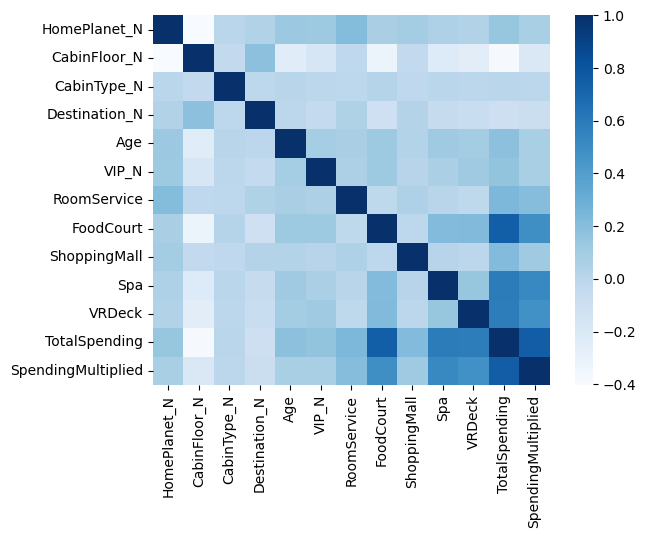

In [9]:
sns.heatmap(heatmap.corr(),
            cmap='Blues',
            annot=False)

### Machine Learning

In [10]:
train_final.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['HomePlanet_N', 'HomePlanet_0', 'HomePlanet_1', 'HomePlanet_2',
       'CryoSleep_N', 'CabinFloor_N', 'CabinFloor_0', 'CabinFloor_1',
       'CabinFloor_2', 'CabinFloor_3', 'CabinFloor_4', 'CabinFloor_5',
       'CabinFloor_6', 'CabinFloor_7', 'CabinNumber', 'CabinNumberBin',
       'CabinType_N', 'CabinType_0', 'CabinType_1', 'Destination_N',
       'Destination_0', 'Destination_1', 'Destination_2', 'Age', 'AgeBin',
       'VIP_N', 'RoomService', 'RoomServiceBin', 'FoodCourt', 'FoodCourtBin',
       'ShoppingMall', 'ShoppingMallBin', 'Spa', 'SpaBin', 'VRDeck',
       'VRDeckBin', 'Transported', 'Transported_N', 'TotalSpending',
       'SpendingMultiplied'],
      dtype='object')>

In [11]:
test_final.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['PassengerId', 'HomePlanet_N', 'HomePlanet_0', 'HomePlanet_1',
       'HomePlanet_2', 'CryoSleep_N', 'CabinFloor_N', 'CabinFloor_0',
       'CabinFloor_1', 'CabinFloor_2', 'CabinFloor_3', 'CabinFloor_4',
       'CabinFloor_5', 'CabinFloor_6', 'CabinFloor_7', 'CabinNumber',
       'CabinNumberBin', 'CabinType_N', 'CabinType_0', 'CabinType_1',
       'Destination_N', 'Destination_0', 'Destination_1', 'Destination_2',
       'Age', 'AgeBin', 'VIP_N', 'RoomService', 'RoomServiceBin', 'FoodCourt',
       'FoodCourtBin', 'ShoppingMall', 'ShoppingMallBin', 'Spa', 'SpaBin',
       'VRDeck', 'VRDeckBin', 'TotalSpending', 'SpendingMultiplied'],
      dtype='object')>

In [16]:
# Selecting the x-variables
x_var = [
#         'HomePlanet_N',
         'HomePlanet_0',
         'HomePlanet_1',
         'HomePlanet_2',
         'CryoSleep_N',
#         'CabinFloor_N',
         'CabinFloor_0',
         'CabinFloor_1',
         'CabinFloor_2',
         'CabinFloor_3',
         'CabinFloor_4',
         'CabinFloor_5',
         'CabinFloor_6',
         'CabinFloor_7',
#         'CabinNumber',
#         'CabinNumberBin',
#         'CabinType_N',
         'CabinType_0',
         'CabinType_1',
#         'Destination_N',
         'Destination_0',
         'Destination_1',
         'Destination_2',
         'Age',
#         'AgeBin',
#         'VIP_N',
         'RoomService',
#         'RoomServiceBin',
         'FoodCourt',
#         'FoodCourtBin',
         'ShoppingMall',
#         'ShoppingMallBin',
         'Spa',
#         'SpaBin',
         'VRDeck',
#         'VRDeckBin',
#         'TotalSpending',
         'SpendingMultiplied'
        ]

In [17]:
# TUNING

# DEFINING X AND Y VARIABLES
x = train_final.loc[:, x_var]
y = train_final.loc[:, 'Transported_N']
col_names = x.columns

# SCALING DATA
scaler = RobustScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

# SPLITTING DATA - with stratification
x_train, x_test, y_train, y_test = train_test_split(
            x_scaled,
            y,
            test_size    = 0.3,
            random_state = 219,
            stratify     = y)

# BALANCING DATA
os = SMOTE(random_state=0)

x_smote,y_smote = os.fit_resample(x_train, y_train)
x_smote = pd.DataFrame(data = x_smote,
                       columns = x_var)
y_smote= pd.Series(data=y_smote)

# ADABOOST TUNING
# Tuning Parameters
n_estimators = np.arange(100,250,500) # The maximum number of estimators (models) to train sequentially. The default is 50. We’ll measure the effect of this hyperparameter soon.
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=1)
base_estimator = [dtree,dtree,dtree]
learning_rate = np.arange(1.0,1.1,1.2) # This determines the weight applied to each estimator in the boosting process. The default is 1. Smaller values such as 0.05, 0.1 force the algorithm to train slower but with high-performance scores. We’ll measure the effect of this hyperparameter soon.

# Creating parameter grids
param_grid = {'n_estimators'     : n_estimators,
              'base_estimator'   : base_estimator,
              'learning_rate'    : learning_rate
             }

# Setting the default random forest model
adaboost = AdaBoostClassifier(random_state = 200)

# Randomized search and choosing of parameters
adaboost_tunedcv = RandomizedSearchCV(estimator           = adaboost,
                                    param_distributions = param_grid,
                                    cv           = 3,
                                    n_iter       = 10,
                                    random_state = 200,
                                    scoring      = make_scorer(roc_auc_score,needs_threshold = False))

# Fitting tuned dataset to original dataset for cross validation
adaboost_tunedcv.fit(x.values, y)

# MODELING WITH TUNED PARAMETERS
adaboost_tuned = adaboost_tunedcv.best_estimator_

# Fit the model
adaboost_tuned = adaboost_tuned.fit(x_smote.values, y_smote)

# Predicting
y_predicted_tuned = adaboost_tuned.predict(x_test)

# Model performance analysis
con_matrix_tuned = confusion_matrix(y_test, y_predicted_tuned)
class_report_tuned = classification_report(y_test,y_predicted_tuned)
AUC_tuned = roc_auc_score(y_test, y_predicted_tuned).round(4)
MSE_tuned = mean_squared_error(y_test, y_predicted_tuned).round(4)
Score_tuned = adaboost_tuned.score(x_test,y_test).round(4)

# 6. Printing results
# Accuracy
print(f"Score: {Score_tuned}")
print(f"""{"-"*50}""")
# Confusion Matrix
print(f"""Confusion Matrix 
{con_matrix_tuned}""")
print(f"""{"-"*50}""")
# Clasification Matrix
print(f"""Classification Report
{class_report_tuned}""")
print(f"""{"-"*50}""")
# AUC
print(f"AUC: {AUC_tuned}")
print(f"""{"-"*50}""")
# MSE
print(f"MSE: {MSE_tuned}")

Score: 0.783
--------------------------------------------------
Confusion Matrix 
[[ 974  321]
 [ 245 1068]]
--------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.75      0.77      1295
           1       0.77      0.81      0.79      1313

    accuracy                           0.78      2608
   macro avg       0.78      0.78      0.78      2608
weighted avg       0.78      0.78      0.78      2608

--------------------------------------------------
AUC: 0.7828
--------------------------------------------------
MSE: 0.217


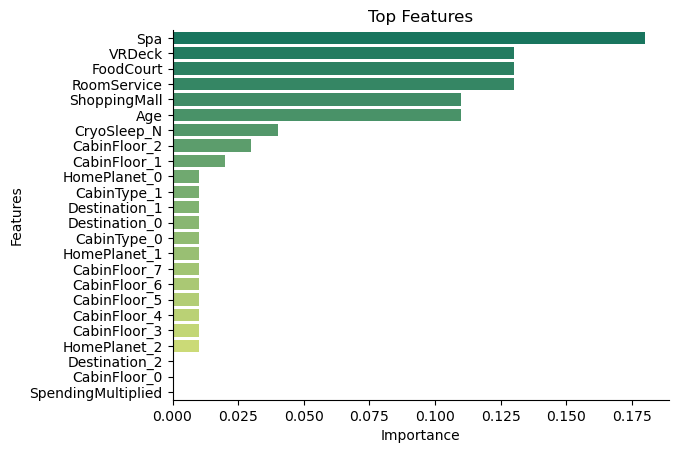

In [18]:
# Identifying Key Features
y_variable=y
x_variables=x
key_features = pd.Series(adaboost_tuned.feature_importances_,index=x_variables.columns).sort_values(ascending=False)

# Graph
sns.barplot(x=key_features, y=key_features.index,palette="summer")
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top Features')
plt.gca().spines['top'].set_color('none')
plt.gca().spines['right'].set_color('none')

plt.show()

### Tuning

In [19]:
# Explore the number of trees - number of trees effect on performance
# https://medium.com/@chaudhurysrijani/tuning-of-adaboost-with-computational-complexity-8727d01a9d20

X = x_smote
y = y_smote

# get a list of models to evaluate
def get_models():
	models = dict()
	# define number of trees to consider
	n_trees = [10, 50, 100, 500, 1000, 5000]
	for n in n_trees:
		models[str(n)] = AdaBoostClassifier(n_estimators=n)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>10 0.765 (0.016)
>50 0.790 (0.015)
>100 0.791 (0.015)
>500 0.790 (0.013)
>1000 0.788 (0.013)
>5000 0.781 (0.014)


In [20]:
# Explore Weak Learnings - explore adaboost ensemble tree depth effect on performance
# https://medium.com/@chaudhurysrijani/tuning-of-adaboost-with-computational-complexity-8727d01a9d20

X = x_smote
y = y_smote

# get a list of models to evaluate
def get_models():
	models = dict()
	# explore depths from 1 to 10
	for i in range(1,11):
		# define base model
		base = DecisionTreeClassifier(max_depth=i)
		# define ensemble model
		models[str(i)] = AdaBoostClassifier(base_estimator=base)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>1 0.790 (0.015)
>2 0.792 (0.015)
>3 0.779 (0.015)
>4 0.763 (0.017)
>5 0.756 (0.016)
>6 0.756 (0.014)
>7 0.761 (0.014)
>8 0.766 (0.011)
>9 0.764 (0.013)
>10 0.769 (0.017)


In [21]:
# Explore Learning Rate - learning rate effect on performance
# https://medium.com/@chaudhurysrijani/tuning-of-adaboost-with-computational-complexity-8727d01a9d20

X = x_smote
y = y_smote

# get a list of models to evaluate
def get_models():
	models = dict()
	# explore learning rates from 0.1 to 2 in 0.1 increments
	for i in arange(0.1, 2.1, 0.1):
		key = '%.3f' % i
		models[key] = AdaBoostClassifier(learning_rate=i)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>0.100 0.754 (0.016)
>0.200 0.784 (0.013)
>0.300 0.787 (0.012)
>0.400 0.788 (0.013)
>0.500 0.790 (0.015)
>0.600 0.790 (0.013)
>0.700 0.789 (0.013)
>0.800 0.790 (0.014)
>0.900 0.790 (0.014)
>1.000 0.790 (0.015)
>1.100 0.787 (0.014)
>1.200 0.790 (0.013)
>1.300 0.787 (0.016)
>1.400 0.786 (0.015)
>1.500 0.785 (0.014)
>1.600 0.788 (0.014)
>1.700 0.783 (0.016)
>1.800 0.779 (0.016)
>1.900 0.767 (0.013)
>2.000 0.282 (0.018)


In [22]:
# example of grid searching key hyperparameters for adaboost on a classification dataset
# define dataset
X = x_smote
y = y_smote
# define the model with default hyperparameters
model = AdaBoostClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.791735 using {'learning_rate': 0.1, 'n_estimators': 500}
0.718434 (0.017699) with: {'learning_rate': 0.0001, 'n_estimators': 10}
0.718434 (0.017699) with: {'learning_rate': 0.0001, 'n_estimators': 50}
0.718434 (0.017699) with: {'learning_rate': 0.0001, 'n_estimators': 100}
0.718434 (0.017699) with: {'learning_rate': 0.0001, 'n_estimators': 500}
0.718434 (0.017699) with: {'learning_rate': 0.001, 'n_estimators': 10}
0.718434 (0.017699) with: {'learning_rate': 0.001, 'n_estimators': 50}
0.718434 (0.017699) with: {'learning_rate': 0.001, 'n_estimators': 100}
0.718434 (0.017699) with: {'learning_rate': 0.001, 'n_estimators': 500}
0.718434 (0.017699) with: {'learning_rate': 0.01, 'n_estimators': 10}
0.718434 (0.017699) with: {'learning_rate': 0.01, 'n_estimators': 50}
0.718434 (0.017699) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.754323 (0.016240) with: {'learning_rate': 0.01, 'n_estimators': 500}
0.718434 (0.017699) with: {'learning_rate': 0.1, 'n_estimators': 10}
0.754269

### TO submission.csv

In [33]:
# CSV

x_test2 = test_final.loc[:,x_var]
y_predicted_test = adaboost_tuned.predict(x_test2)

predictions = pd.DataFrame(data = {'PassengerId':test_final['PassengerId'],
                                   'Transported':y_predicted_test.astype(bool)})

predictions.head(5)

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,True


In [34]:
predictions.to_csv(path_or_buf = 'submission-adaboost_tuned.csv',
                   index=False)